In [58]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
import statsmodels.formula.api as smf

In [3]:
## Importing data
path = 'experiments_data.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,respondent_id,age,gender,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_interested,post_interested,pre_guilty,post_guilty,pre_ethusiastic,post_ethusiastic,pre_upset,post_upset,pre_inspired,post_inspired
0,24,26,female,United States,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,0.000000,...,3,2,3,2,1,2,2,2,2,2
1,25,25,male,United States,RO,2018-11-17 01:22:27.974986+00:00,2018-11-17 01:23:18.119645+00:00,6,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,26,25,female,United States,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,0.000000,...,0,2,0,1,0,4,0,1,0,1
3,27,32,male,Kenya,ROXO,2018-11-17 01:46:18.703943+00:00,2018-11-17 01:46:18.917251+00:00,2,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,28,28,female,United States,ROXO,2018-11-17 01:47:34.454053+00:00,2018-11-17 01:53:51.607042+00:00,6,0,238.225232,...,4,0,2,0,5,0,3,0,5,0


# EDA

In [5]:
df.describe()

,respondent_id,age,level,number_check,time_spent_in_treatment_or_control,pre_positive_affect,pre_negative_affect,post_positive_affect,post_negative_affect,pre_scared,...,pre_interested,post_interested,pre_guilty,post_guilty,pre_ethusiastic,post_ethusiastic,pre_upset,post_upset,pre_inspired,post_inspired
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,46.500000,30.391304,5.543478,1.217391,124.859540,12.543478,15.760870,11.108696,14.413043,1.260870,...,1.913043,1.717391,0.760870,0.739130,1.608696,1.521739,1.195652,1.173913,1.673913,1.434783
std,13.422618,12.036017,2.040768,2.682561,405.991202,12.330101,15.240567,11.011566,14.232320,1.511949,...,1.871732,1.784664,0.873938,0.854655,1.705915,1.656491,1.392353,1.338396,1.751880,1.600724
min,24.000000,23.000000,2.000000,0.000000,-11.819935,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,25.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.500000,27.000000,7.000000,0.000000,0.000000,15.500000,22.000000,12.000000,15.500000,1.000000,...,2.500000,2.000000,1.000000,1.000000,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,57.750000,30.750000,7.000000,0.000000,34.197793,22.000000,28.000000,19.750000,26.000000,2.000000,...,3.750000,3.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
max,69.000000,99.000000,7.000000,7.000000,2646.046636,37.000000,41.000000,36.000000,43.000000,5.000000,...,5.000000,5.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5,1,'Participant Age Distribution')

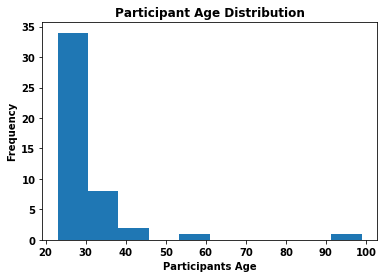

In [29]:
# plotting distribution of age
df.age.hist(grid=False)
plt.xlabel('Participants Age')
plt.ylabel('Frequency')
plt.title('Participant Age Distribution')

Text(0.5,1,'Participant Group Distribution')

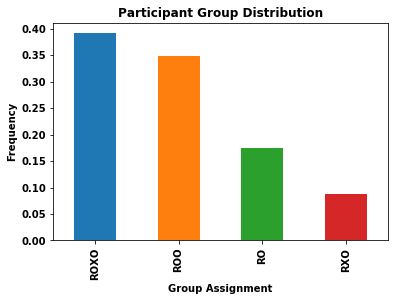

In [28]:
# plotting distribution of groups
ratio_of_groups = df['group'].value_counts()/sum(df['group'].value_counts())
ratio_of_groups.plot(kind='bar')
plt.xlabel('Group Assignment')
plt.ylabel('Frequency')
plt.title('Participant Group Distribution')

In [30]:
df.head()

,respondent_id,age,gender,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_interested,post_interested,pre_guilty,post_guilty,pre_ethusiastic,post_ethusiastic,pre_upset,post_upset,pre_inspired,post_inspired
0,24,26,female,United States,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,0.000000,...,3,2,3,2,1,2,2,2,2,2
1,25,25,male,United States,RO,2018-11-17 01:22:27.974986+00:00,2018-11-17 01:23:18.119645+00:00,6,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,26,25,female,United States,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,0.000000,...,0,2,0,1,0,4,0,1,0,1
3,27,32,male,Kenya,ROXO,2018-11-17 01:46:18.703943+00:00,2018-11-17 01:46:18.917251+00:00,2,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,28,28,female,United States,ROXO,2018-11-17 01:47:34.454053+00:00,2018-11-17 01:53:51.607042+00:00,6,0,238.225232,...,4,0,2,0,5,0,3,0,5,0


# Data Cleaning

Notes:
* 1. Remove people assigned to treatment but did not get the correct number check and who do not get to level 7
* 2. Remove people in the control group who did not get to level 7

### 1

In [50]:
df_ROXO = df[((df.group.isin(['ROXO'])) &  (df.number_check == 7) & (df.level == 7))]

In [49]:
df_RXO = df[((df.group.isin(['RXO'])) &  (df.number_check == 7) & (df.level == 7))]

### 2.

In [51]:
df_ROO =  df[((df.group.isin(['ROO'])) & (df.level == 7) ) ]

In [53]:
df_RO = df[((df.group.isin(['RO'])) & (df.level == 7) ) ]

In [55]:
## Recombining all the dataframes
df_clean = pd.concat([df_RO, df_ROO, df_ROXO, df_RXO])

# Analysis

In [62]:
df_clean.groupby('group')['pre_positive_affect','pre_negative_affect', 'post_positive_affect', 'post_negative_affect'].mean()

,pre_positive_affect,pre_negative_affect,post_positive_affect,post_negative_affect
group,,,,
RO,0.000000,0.000000,16.75,17.500000
ROO,22.833333,28.250000,20.00,25.666667
ROXO,24.714286,28.857143,22.00,30.428571
RXO,0.000000,0.000000,16.00,18.000000


In [66]:
df_clean['Change_Positive'] = df_clean['post_positive_affect'] - df_clean['pre_positive_affect'] 
df_clean['Change_Negative'] =  df_clean['post_negative_affect'] - df_clean['pre_negative_affect'] 

In [67]:
df_clean.groupby('group')['Change_Positive', 'Change_Negative'].mean()

,Change_Positive,Change_Negative
group,,
RO,16.750000,17.500000
ROO,-2.833333,-2.583333
ROXO,-2.714286,1.571429
RXO,16.000000,18.000000


In [69]:
df_clean.head()

,respondent_id,age,gender,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_guilty,post_guilty,pre_ethusiastic,post_ethusiastic,pre_upset,post_upset,pre_inspired,post_inspired,Change_Positive,Change_Negative
2,26,25,female,United States,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,0.0,...,0,1,0,4,0,1,0,1,15,20
6,30,36,male,Kenya,RO,2018-11-17 03:07:01.091136+00:00,2018-11-17 03:13:46.047357+00:00,7,0,0.0,...,0,4,0,2,0,3,0,2,27,23
21,45,42,male,United States,RO,2018-11-17 20:22:39.466785+00:00,2018-11-17 20:25:09.052666+00:00,7,0,0.0,...,0,1,0,1,0,1,0,1,12,16
29,53,29,male,United States,RO,2018-11-17 22:22:02.013427+00:00,2018-11-17 22:25:35.802046+00:00,7,0,0.0,...,0,1,0,1,0,1,0,1,13,11
0,24,26,female,United States,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,0.0,...,3,2,1,2,2,2,2,2,-8,-1


In [74]:
a = smf.ols('Change_Positive ~ group + C(gender)+ group*gender ', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

C:\Users\hamsh\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 6
  'rank is %d' % (J, J_), ValueWarning)


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,15.0000,12.000,1.250,0.211,-8.520,38.520
group[T.ROO],-17.8000,12.121,-1.468,0.142,-41.557,5.957
group[T.ROXO],-16.7500,12.068,-1.388,0.165,-40.403,6.903
group[T.RXO],-0.6667,40.110,-0.017,0.987,-79.280,77.947
C(gender)[T.male],1.1667,6.693,0.174,0.862,-11.951,14.284
gender[T.male],1.1667,6.693,0.174,0.862,-11.951,14.284
group[T.ROO]:gender[T.male],-2.3905,13.565,-0.176,0.860,-28.977,24.196
group[T.ROXO]:gender[T.male],-4.5833,13.521,-0.339,0.735,-31.083,21.916
group[T.RXO]:gender[T.male],-0.6667,40.110,-0.017,0.987,-79.280,77.947
